In [12]:
#First import the library pandas
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the file
df = pd.read_csv(r"HR_5000 Records.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  5002 non-null   int64  
 1   Name Prefix             5002 non-null   object 
 2   First Name              5002 non-null   object 
 3   Middle Initial          5002 non-null   object 
 4   Last Name               5002 non-null   object 
 5   Gender                  5002 non-null   object 
 6   E Mail                  5002 non-null   object 
 7   Father's Name           5002 non-null   object 
 8   Mother's Name           5002 non-null   object 
 9   Mother's Maiden Name    5002 non-null   object 
 10  Date of Birth           5002 non-null   object 
 11  Time of Birth           5002 non-null   object 
 12  Age in Yrs.             5002 non-null   float64
 13  Weight in Kgs.          5002 non-null   int64  
 14  Date of Joining         5002 non-null   

In [17]:
#print(df['Age in Company (Years)']).max()
# [["Name Prefix"]].max())

In [6]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df['Last % Hike'] = df['Last % Hike'].str.strip()
df['Last % Hike'] = df['Last % Hike'].str.replace('%','', regex = False)
df['Last % Hike'] = df['Last % Hike'].astype(float)

In [7]:
df["Age in Yrs."] = df['Age in Yrs.'].astype(int)

In [ ]:
#this suggests that the pay rate is fair between gender and not much fluctuations
fil_df = df.groupby("Gender")[["Salary"]].mean()
fil_df

In [9]:
selected_columns = ['Year of Joining', 'Salary']

below_means_df = df[df['Salary'] < 159957][selected_columns]
above_means_df = df[df['Salary'] > 159957][selected_columns]


num_people_below_means = below_means_df.shape[0]
num_people_above_means = above_means_df.shape[0]

print(f"Number of people who get salary below 159957: {num_people_below_means}")
print(f"Mean salary for people below 40: {below_means_df['Salary'].mean():.2f}\n")

print(f"Number of people who get salary above 159957: {num_people_above_means}")
print(f"Mean salary for people above 40: {above_means_df['Salary'].mean():.2f}")

Number of people who get salary below 159957: 3742
Mean salary for people below 40: 99784.78

Number of people who get salary above 159957: 1260
Mean salary for people above 40: 179926.48


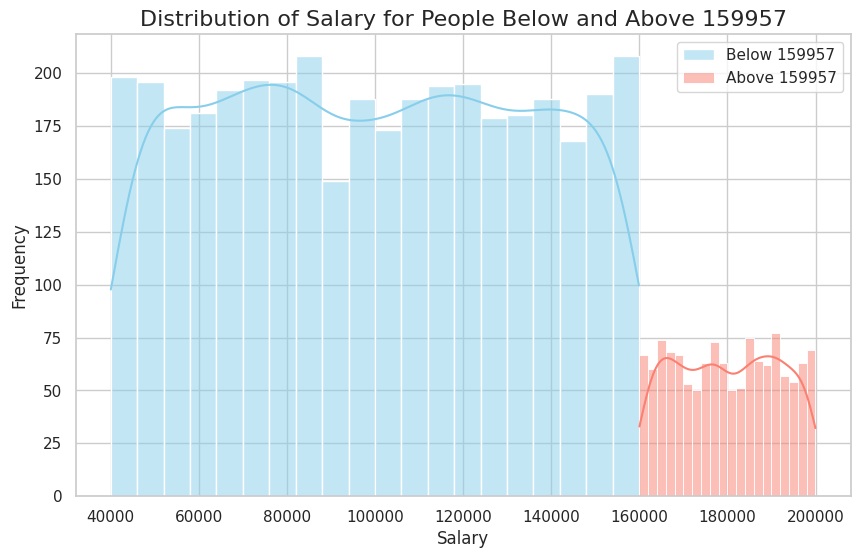

In [15]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(below_means_df['Salary'], bins=20, kde=True, color='skyblue', label='Below 159957', ax=ax)
sns.histplot(above_means_df['Salary'], bins=20, kde=True, color='salmon', label='Above 159957', ax=ax)

ax.set(xlabel='Salary', ylabel='Frequency')
ax.set_title('Distribution of Salary for People Below and Above 159957', fontsize=16)

ax.legend()
plt.show()

In [ ]:
#chosen
df["Progress"] = 2017 - df['Year of Joining'].astype(int)
df.groupby(["Salary", "Last % Hike"])[['Progress']].mean()

In [ ]:
#chosen
selected_columns = ['Last % Hike', 'Salary']

below_means_df = df[df['Last % Hike'] < 15.0][selected_columns]
above_means_df = df[df['Last % Hike'] > 15.0][selected_columns]
equal_means_df = df[df['Last % Hike'] == 15.0][selected_columns]

num_people_below_means = below_means_df.shape[0]
num_people_above_means = above_means_df.shape[0]
num_people_equal_means = equal_means_df.shape[0]

print(f"Number of people who get salary with the last % hike of <15: {num_people_below_means}")
print(f"Mean salary for people below 15%: {below_means_df['Salary'].mean():.2f}\n")

print(f"Number of people who get salary with the last % hike of >15: {num_people_above_means}")
print(f"Mean salary for people above 15%: {above_means_df['Salary'].mean():.2f}\n")

print(f"Number of people who get salary with the last % hike of 15: {num_people_equal_means}")
print(f"Mean salary for people with last % hike of 15%: {equal_means_df['Salary'].mean():.2f}\n")

In [ ]:
import matplotlib.pyplot as plt

test = df.groupby('Name Prefix')['Salary'].mean()


# Create a bar plot
plt.figure(figsize=(7, 4))
test.plot(kind='bar', color='violet')
plt.title('Mean Salary by Name Prefix')
plt.xlabel('Name Prefix')
plt.ylabel('Mean Salary')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[['Age in Yrs.', 'Year of Joining', 'Salary']]
df_group = df_filtered.groupby(['Age in Yrs.','Salary'])
df_mean = df.groupby('Year of Joining')['Salary'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year of Joining', y='Salary', data=df_mean)
plt.title('Scatter Plot of Year of Joining vs Salary')
plt.xlabel('Year of Joining')
plt.ylabel('Salary')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

selected_columns = ['Year of Joining', 'Salary']

below_means_df = df[df['Salary'] < 159957][selected_columns]
above_means_df = df[df['Salary'] > 159957][selected_columns]

# Plotting histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.hist(below_means_df['Salary'], bins=40, color='brown', alpha=0.5)
plt.title('Histogram of Salary for People Below $159,957')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(above_means_df['Salary'], bins=40, color='violet', alpha=0.5)
plt.title('Histogram of Salary for People Above $159,957')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

selected_columns = ['Year of Joining', 'Salary']

below_means_df = df[df['Salary'] < 159957][selected_columns]
above_means_df = df[df['Salary'] > 159957][selected_columns]

# Plotting histograms
plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.hist(below_means_df['Salary'], bins=40, color='skyblue', alpha=0.7)
plt.title('Salary Distribution Below $159,957')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(above_means_df['Salary'], bins=40, color='salmon', alpha=0.7)
plt.title('Salary Distribution Above $159,957')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.suptitle('Comparison of Salary Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to prevent the title from being clipped
plt.show()
